# Assignment 3.1: Linear Regression for IoT
- Name: Maria Carolina Leal Cardenas
- Date: 01/27/2024

In [ ]:
# Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# Loading additional libraries.
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error

## Load and prepare your data

We'll be using the cleaned household electric consumption dataset from Module 2 in this assignment. I recommend saving your dataset by running df.to_csv("filename") at the end of the last assignment so that you don't have to re-do your cleaning steps. If you are not confident in your own cleaning steps, you may ask your instructor for a cleaned version of the data. You will not be graded on the cleaning steps in this assignment, but some functions may not work if you use the raw data.

We need to turn our datetime column into a numeric value to be used as a variable in our linear regression. In the lab session, we created a new column of minutes and just incremented the value by 10 since we knew that the readings occurred every 10 minutes. In this dataset, we have readings every minute, but we might have some missing rows depending on how you cleaned your data. So instead we will convert our datetime column to something called [unix/epoch time](https://en.wikipedia.org/wiki/Unix_time), which is the number of seconds since midnight on 1/1/1970.

**TODO: load your data and convert the datetime column into epoch/unix time**

In [ ]:
# Loading data into a pandas dataframe
df = pd.read_csv('/content/sample_data/household_power_clean.csv', sep= ',')
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
0,0,2006-12-16,17:24:00,4.21600,0.41800,234.84000,18.40000,0.00000,1.00000,17.00000,2006-12-16 17:24:00,NaN,NaN,NaN,NaN
1,1,2006-12-16,17:25:00,5.36000,0.43600,233.63000,23.00000,0.00000,1.00000,16.00000,2006-12-16 17:25:00,NaN,NaN,NaN,NaN
2,2,2006-12-16,17:26:00,5.37400,0.49800,233.29000,23.00000,0.00000,2.00000,17.00000,2006-12-16 17:26:00,NaN,NaN,NaN,NaN
3,3,2006-12-16,17:27:00,5.38800,0.50200,233.74000,23.00000,0.00000,1.00000,17.00000,2006-12-16 17:27:00,NaN,NaN,NaN,NaN
4,4,2006-12-16,17:28:00,3.66600,0.52800,235.68000,15.80000,0.00000,1.00000,17.00000,2006-12-16 17:28:00,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(99526, 15)

In [ ]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,gap_monthly,grp_monthly,v_monthly,gi_monthly
count,99526.00000,99525.00000,99525.00000,99525.00000,99525.00000,99525.00000,99525.00000,99525.00000,99496.00000,99496.00000,99496.00000,99496.00000
mean,49766.94967,1.65171,0.12863,240.81711,6.98287,1.32104,1.91752,7.54438,1.65150,0.12860,240.81838,6.98194
std,28732.47105,1.34441,0.11732,3.46848,5.67056,6.70260,7.62759,8.67157,1.21228,0.07789,3.26403,5.11027
min,0.00000,0.19400,0.00000,223.49000,0.80000,0.00000,0.00000,0.00000,0.21787,0.00340,227.12800,0.86667
25%,24885.25000,0.39800,0.00000,238.52000,1.80000,0.00000,0.00000,0.00000,0.45812,0.07440,238.62200,2.04000
50%,49767.50000,1.42000,0.11600,241.05000,5.80000,0.00000,0.00000,0.00000,1.45270,0.10700,241.01433,6.07333
75%,74649.75000,2.42000,0.19800,243.28000,10.00000,0.00000,1.00000,17.00000,2.42627,0.16280,243.17917,10.09333
max,99533.00000,9.41000,0.87400,251.70000,41.80000,77.00000,78.00000,20.00000,7.50873,0.66720,250.90067,32.62667


In [ ]:
df.dtypes

Unnamed: 0                 int64
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Datetime                  object
gap_monthly              float64
grp_monthly              float64
v_monthly                float64
gi_monthly               float64
dtype: object

In [ ]:
# Converting Datetime column into datetime format.
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df.dtypes

Unnamed: 0                        int64
Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
gap_monthly                     float64
grp_monthly                     float64
v_monthly                       float64
gi_monthly                      float64
dtype: object

In [ ]:
# Converting "Datetime" to epoch/unix time.
df['unix']=df['Datetime'].astype(np.int64)//10**9   # This part of the code df['Datetime'].astype(np.int64) , converts the "datetime" column to a NumPy int64 data type, representing the datetime values as integers; in this case nanoseconds for Unix epoch.
                                                    # //10**9 , divides the integer representation of datetime by 10 ^ 9 to convert nanoseconds to seconds. This step is necessary because Unix time is typically in seconds.


In [ ]:
df.dtypes

Unnamed: 0                        int64
Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
gap_monthly                     float64
grp_monthly                     float64
v_monthly                       float64
gi_monthly                      float64
unix                              int64
dtype: object

In [ ]:
df.unix.head()

0    1166289840
1    1166289900
2    1166289960
3    1166290020
4    1166290080
Name: unix, dtype: int64

## Predicting Global Active Power

We will follow the code from the Chapter 9 in our textbook and the recorded lab session from this week to predict the Global Active Power (GAP) with linear regression.

First we will create our x (time) and y (GAP) training variables, and then define our model parameters.

**Q: What is ph? What is mu?**

A:  
  -   ph", is the prediction horizon, represents the duration over which the model provides estimates about future outcomes.
  - "mu", is the forgetting factor, also known as the smoothing parameter, is a value between : 0 and 1. It determines how quickly the model forgets older observations as new data becomes available. The choice of the forgetting factor influences the responsiveness of the forecasting model to recent changes in the time series data.

**TODO: Set the ph to be 5 minutes--consider the units that our time column is measured in.**

In [ ]:
df.Time.head()

0    17:24:00
1    17:25:00
2    17:26:00
3    17:27:00
4    17:28:00
Name: Time, dtype: object

In [ ]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Global_active_power)

ph = 5 * 60 # 5 minutes represented in seconds.
ph_index = ph / 60  # the data resolution is of 1 minute, converting it to seconds equals to 60.
mu = 0.01

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

**Q: With mu = 0.9, how much weight will our first data point have on the last (5000th) prediction in our limited dataset?**

A: Using the following formular : weights = np.ones(ns) * mu. Weight is equal to 0.9.

**TODO: Following the code from Chapter 10 and the lab session, use linear regression to predict a rolling GAP for our dataset. Store these predictions in the tp_pred and yp_pred lists created above for visualization.**

In [ ]:
# Calculating weights by using formula = np.ones(ns) * mu.
weights=np.ones(n_s) * mu ; print(weights)

[0.9 0.9 0.9 ... 0.9 0.9 0.9]


In [ ]:
df.unix.head()

0    1166289840
1    1166289900
2    1166289960
3    1166290020
4    1166290080
Name: unix, dtype: int64

In [ ]:
df.Global_active_power.head()

0   4.21600
1   5.36000
2   5.37400
3   5.38800
4   3.66600
Name: Global_active_power, dtype: float64

In [ ]:
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = df['unix'].iloc[0:i]
    ys_tmp = df['Global_active_power'].iloc[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k] * (mu ** (ns-k-1))
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    lm_tmp.fit(ts_tmp.values.reshape(-1,1), ys_tmp, sample_weight=weights)
    model_tmp = lm_tmp.predict(ts_tmp.values.reshape(-1,1))

    #store model coefficients and intercepts to compute prediction
    m_tmp = lm_tmp.coef_[0]
    q_tmp = lm_tmp.intercept_


    #use ph to make the model prediction according to the prediction time
    tp = ts_tmp.iloc[-1] + ph
    yp = m_tmp * tp + q_tmp

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Now let's visualize the results from our model.

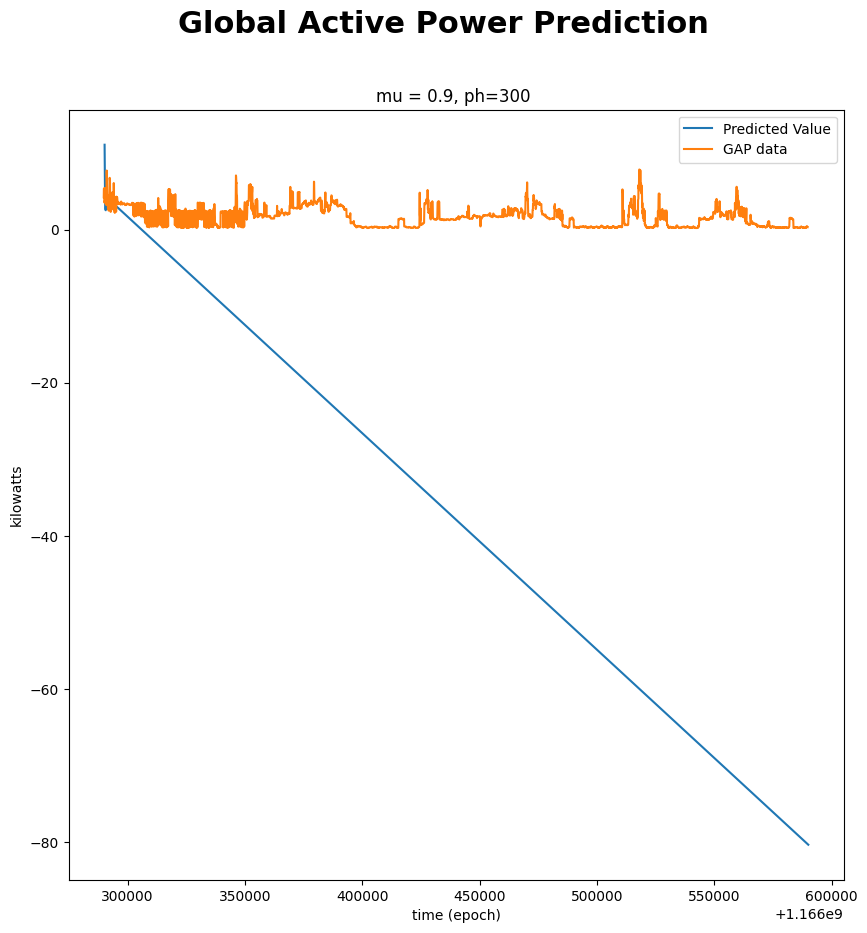

In [ ]:
# Visualizing the result of the model.
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

It's difficult to tell how the model is performing from this plot.

**TODO: Modify the code above to visualize the first and last 200 datapoints/predictions (can be in separate charts) and compute the MSE for our predictions.**

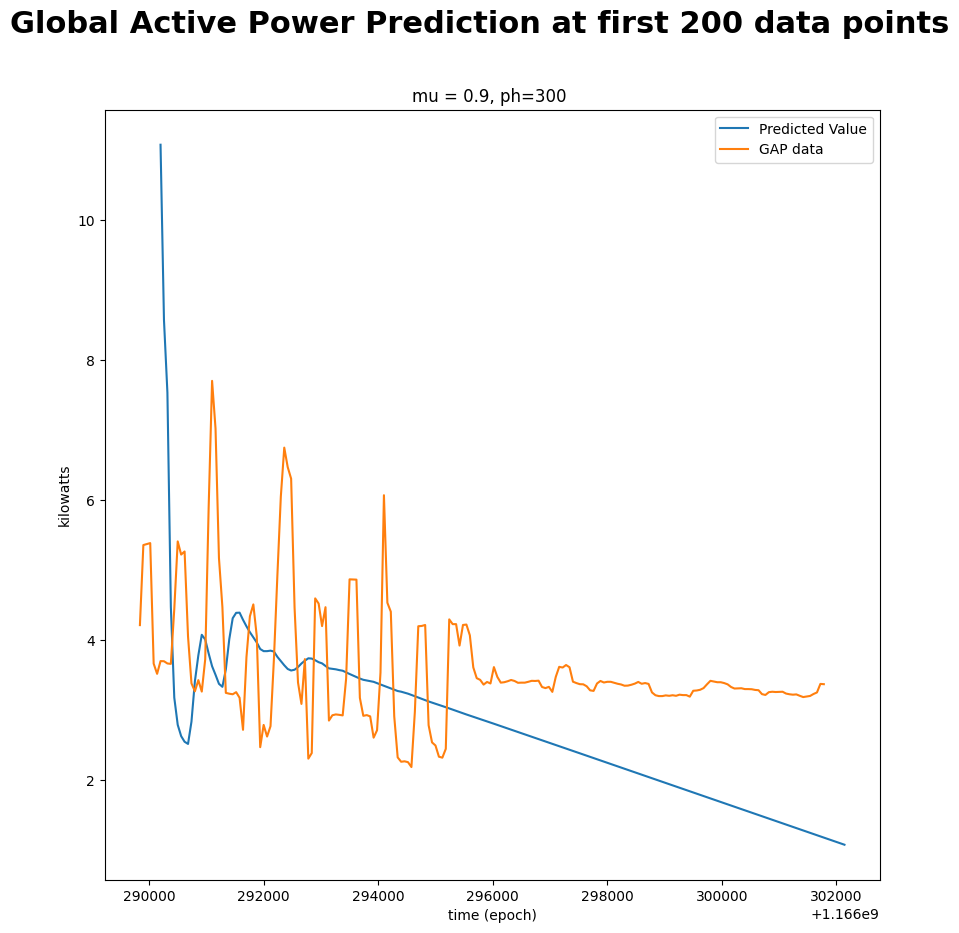

In [ ]:
#Plot first 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction at first 200 data points', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

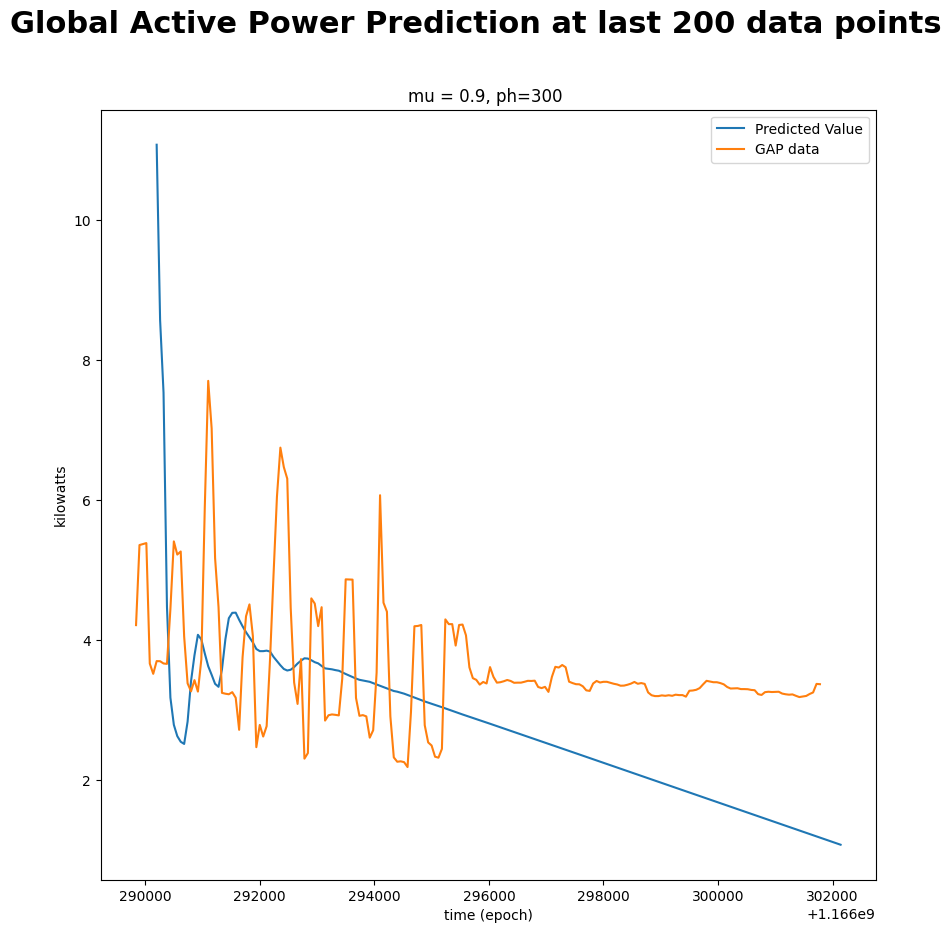

In [ ]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for the last 200 data points', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

In [ ]:
# Calculating MSE of predictions
print("MSE for the 5000 data points is", mean_squared_error(ys['Global_active_power'].iloc[int(ph_index):5000+int(ph_index)-1], yp_pred))
print("MSE for the last 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[0:200], yp_pred[0:200]))
print("MSE for the first 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[:200], yp_pred[:200]))



MSE for the 5000 data points is 2147.7659933800037
MSE for the last 200 data point  is 2.0454932469681184
MSE for the first 200 data point  is 2.0454932469681184


**Q: How did our model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: I proceeded to calculate the MSE for the entire data sample of 5000 points and for the first and  last 200 points. At the 5000 points, we cannot appreciate the performance of the true values of the data, so taking a smaller scope was essential. However, only through the beginning of 290,000 seconds to 292,000 seconds, the predicted data line behaved similarly to the real data with some high peaks present. Just reaching approximately 294,000 seconds, the predicted data started declining too fast. A lower MSE suggests a smaller error between the predictions and the actual values, which is reflected by just observing the 200 points. However, a higher MSE suggests a larger error between the predictions and the actual values, which we can identify by taking the entire 5000 points of observations.

**TODO: Re-run the prediction code with mu = 1 and mu = 0.01. Use the cells below to produce charts for the first and last 200 points and to compute the MSE for each of these sets of predictions.**

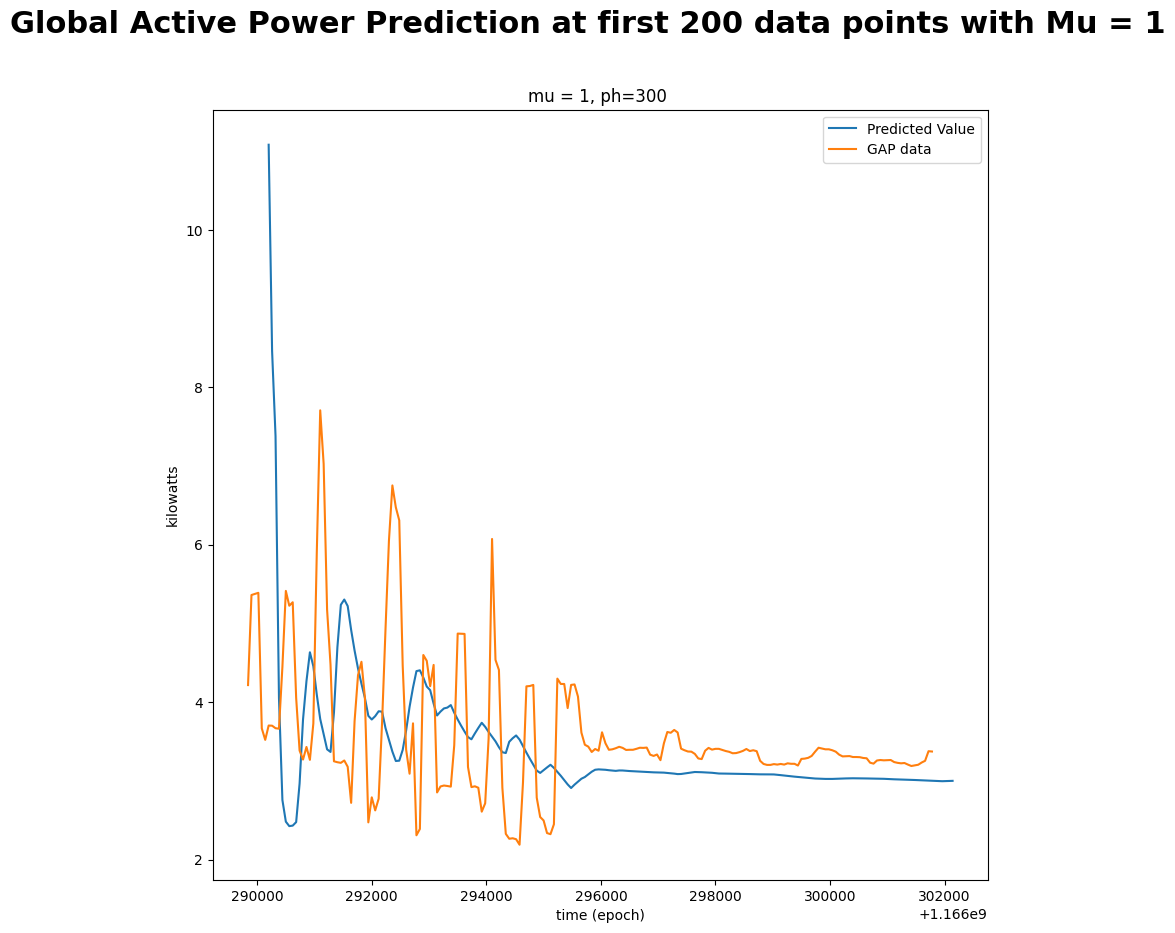

In [ ]:
#Plot first 200 data points/predictions for mu = 1
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction at first 200 data points with Mu = 1', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

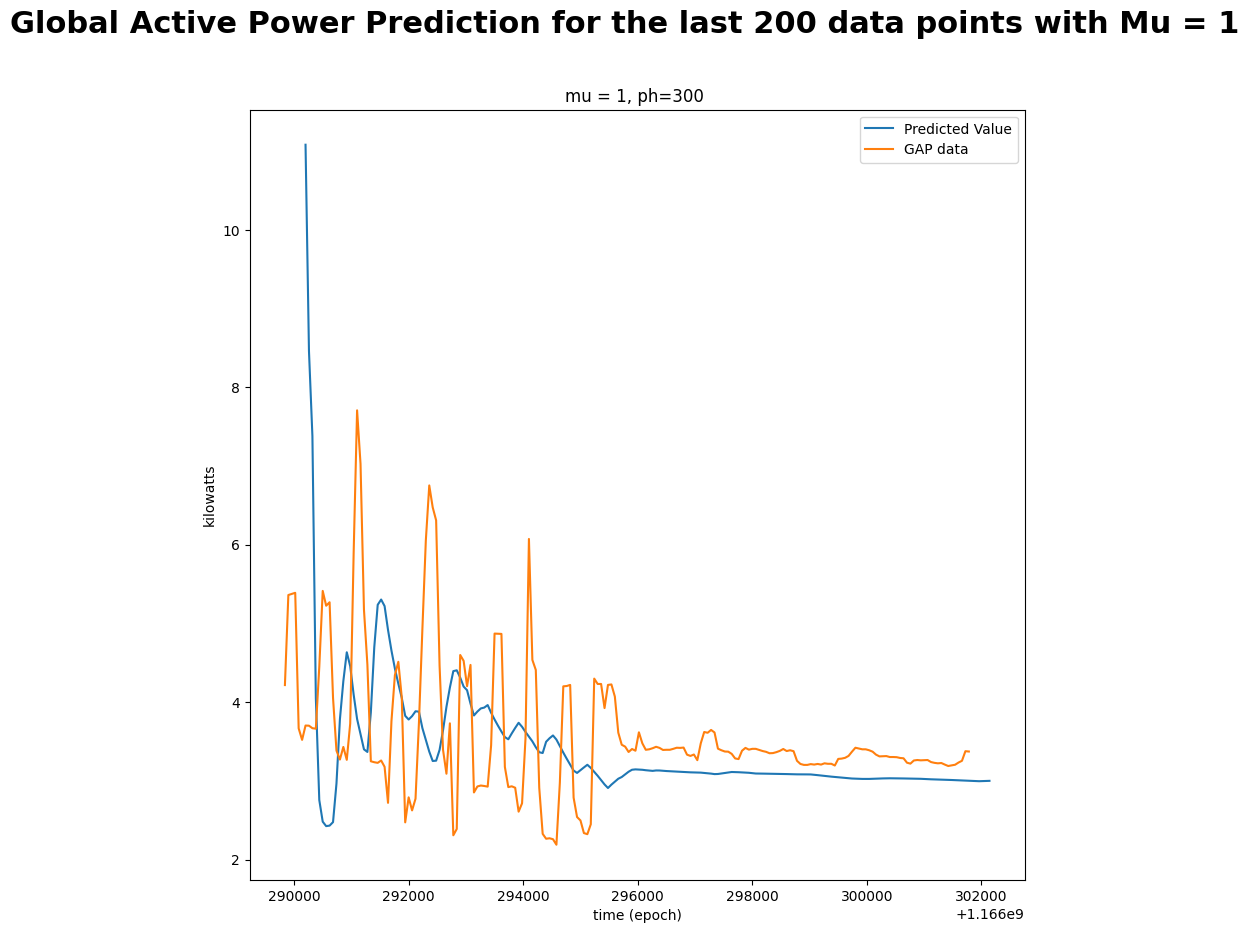

In [ ]:
#Plot last 200 data points/predictions for mu = 1
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for the last 200 data points with Mu = 1', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()


In [ ]:
#Calculate MSE of predictions for mu = 1
print("MSE with 'mu'= 1; for the 5000 data points is", mean_squared_error(ys['Global_active_power'].iloc[int(ph_index):5000+int(ph_index)-1], yp_pred))
print("MSE with 'mu'= 1;  for the last 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[0:200], yp_pred[0:200]))
print("MSE with 'mu'= 1;  for the first 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[:200], yp_pred[:200]))

MSE with 'mu'= 1; for the 5000 data points is 1.4433474819593302
MSE with 'mu'= 1;  for the last 200 data point  is 0.8258088083032391
MSE with 'mu'= 1;  for the first 200 data point  is 0.8258088083032391


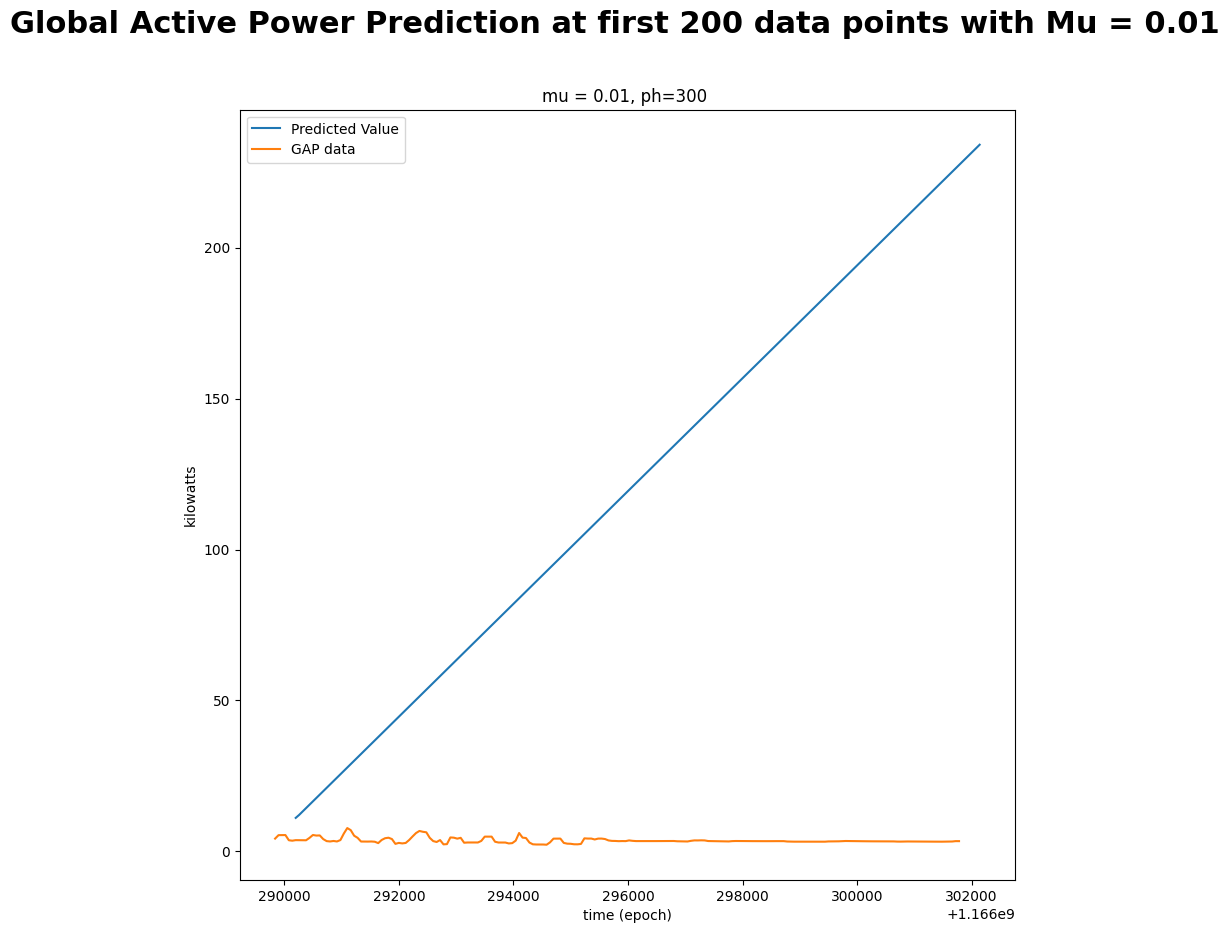

In [ ]:
#Plot first 200 data points/predictions for mu = 0.01
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction at first 200 data points with Mu = 0.01', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

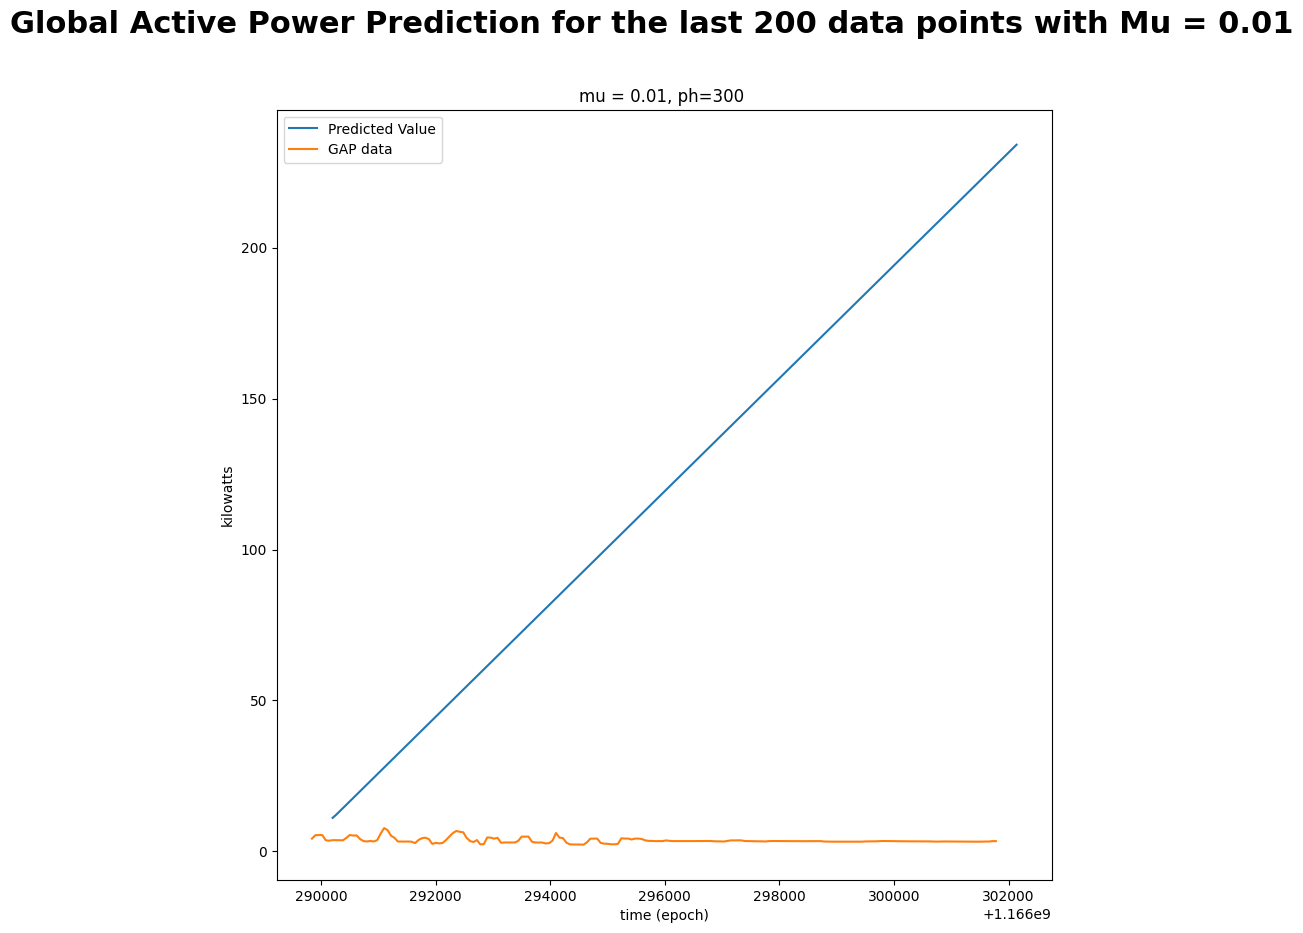

In [ ]:
#Plot last 200 data points/predictions for mu = 0.01
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for the last 200 data points with Mu = 0.01', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

In [ ]:
#Calculate MSE of predictions for mu = 0.01
print("MSE with 'mu'= 0.01; for the 5000 data points is", mean_squared_error(ys['Global_active_power'].iloc[int(ph_index):5000+int(ph_index)-1], yp_pred))
print("MSE with 'mu'= 0.01;  for the last 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[0:200], yp_pred[0:200]))
print("MSE with 'mu'= 0.01;  for the first 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[:200], yp_pred[:200]))

MSE with 'mu'= 0.01; for the 5000 data points is 10527735.463323783
MSE with 'mu'= 0.01;  for the last 200 data point  is 18383.188590397494
MSE with 'mu'= 0.01;  for the first 200 data point  is 18383.188590397494


**Q: How did our mu = 1 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: For mu = 1:

The MSE for the 5000 data points is relatively low (1.44), indicating a good overall fit.
The MSE for the last 200 data points and the first 200 data points is even lower (0.83), suggesting a better fit for this subset of the data.

For mu = 0.9:

The MSE for the 5000 data points is higher (2147.77), indicating a larger error compared to the actual values.
The MSE for the last 200 data points and the first 200 data points is also higher (2.05), suggesting a less accurate fit for this subset.
In summary, a lower MSE indicates a better fit, meaning the predicted values are closer to the actual values. Therefore,the model with mu = 1 performs better than the model with mu = 0.9.

Additionally, with Mu = 1, we observe a more accurate alignment of the predicted data with the true values of the linear regression. While the predicted line closely follows the trend of the true values, it does not exhibit the same high peaks as the actual data.

**Q: How did our mu = 0.01 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A:  For mu = 0.01:

The MSE for the 5000 data points is very high (10527735.46), suggesting a substantial error between the predicted and actual values for the entire dataset.
The MSE for the last 200 data points and the first 200 data points is also high (18383.19), indicating that the model's performance does not improve significantly when considering a smaller subset of data.

We can observe that the true value is represented as a flat line, while the predicted line exhibits a quick upward incline. However, this representation does not accurately reflect the underlying data. This behavior is primarily associated with the small value chosen for the forgetting factor. In this case, the algorithm rapidly forgets old data, leading to swift adjustments in making predictions.


**Q: Which of these three models is the best? How do you know? Why does this make sense based on the mu parameter used?**

A:  Based on the MSE values , Mu = 1 seems to be the most favorable model, as it achieves lower MSE values for both n_samples= 5000 data points and for 200 points. However, it is essential to consider the trade-off between capturing extreme peaks and overall accuracy.

**Q: What could we do to improve our model and/or make it more realistic and useful?**

A:  We can improve our model by applying different techniques:
- 1.- Feature engineering: by using additional variables that could enhance the model's prediction power.
- 2.- Hyperparameter tuning: by experimenting with different values on the - hyperparameters just as we did with "mu".
- 3.- Applying other model evaluation metric; such as : Mean Absolute error, R-squared.
- 4.- Exploring other possibilities using ensemble methods, such as combining multiple prediction models as we saw during the books' lecture.


**TODO: Add voltage data as a second variable to our model and re-run the prediction code. Then visualize the first and last 200 points and compute the MSE**

In [ ]:
#add voltage to the x-variables in our dataset
ts = pd.DataFrame(df[['unix', 'Voltage']])
ys = pd.DataFrame(df.Global_active_power)

ph = 5 * 60 # 5 minutes represented in seconds.
ph_index = ph / 60  # the data resolution is of 1 minute, converting it to seconds equals to 60.
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [ ]:
#run the prediction code on your expanded dataset
#make sure to adjust your yp prediction to include the coefficients from time AND voltage
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):  # start out with 2 leading datapoints
    # get x and y data "available" for our prediction
    ts_tmp = df[['unix', 'Voltage']].iloc[0:i]
    ys_tmp = df['Global_active_power'].iloc[0:i]
    ns = len(ys_tmp)

    weights = np.ones(ns) * mu
    for k in range(ns):
        # adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k] * (mu ** (ns-k-1))
    weights = np.flip(weights, 0)

    # perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    lm_tmp.fit(ts_tmp.values, ys_tmp, sample_weight=weights)
    model_tmp = lm_tmp.predict(ts_tmp.values)

    # store model coefficients and intercepts to compute prediction
    m_tmp = lm_tmp.coef_
    q_tmp = lm_tmp.intercept_

    # use ph to make the model prediction according to the prediction time
    tp = ts_tmp.iloc[-1]['unix'] + ph
    yp = m_tmp[0] * tp + q_tmp

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp



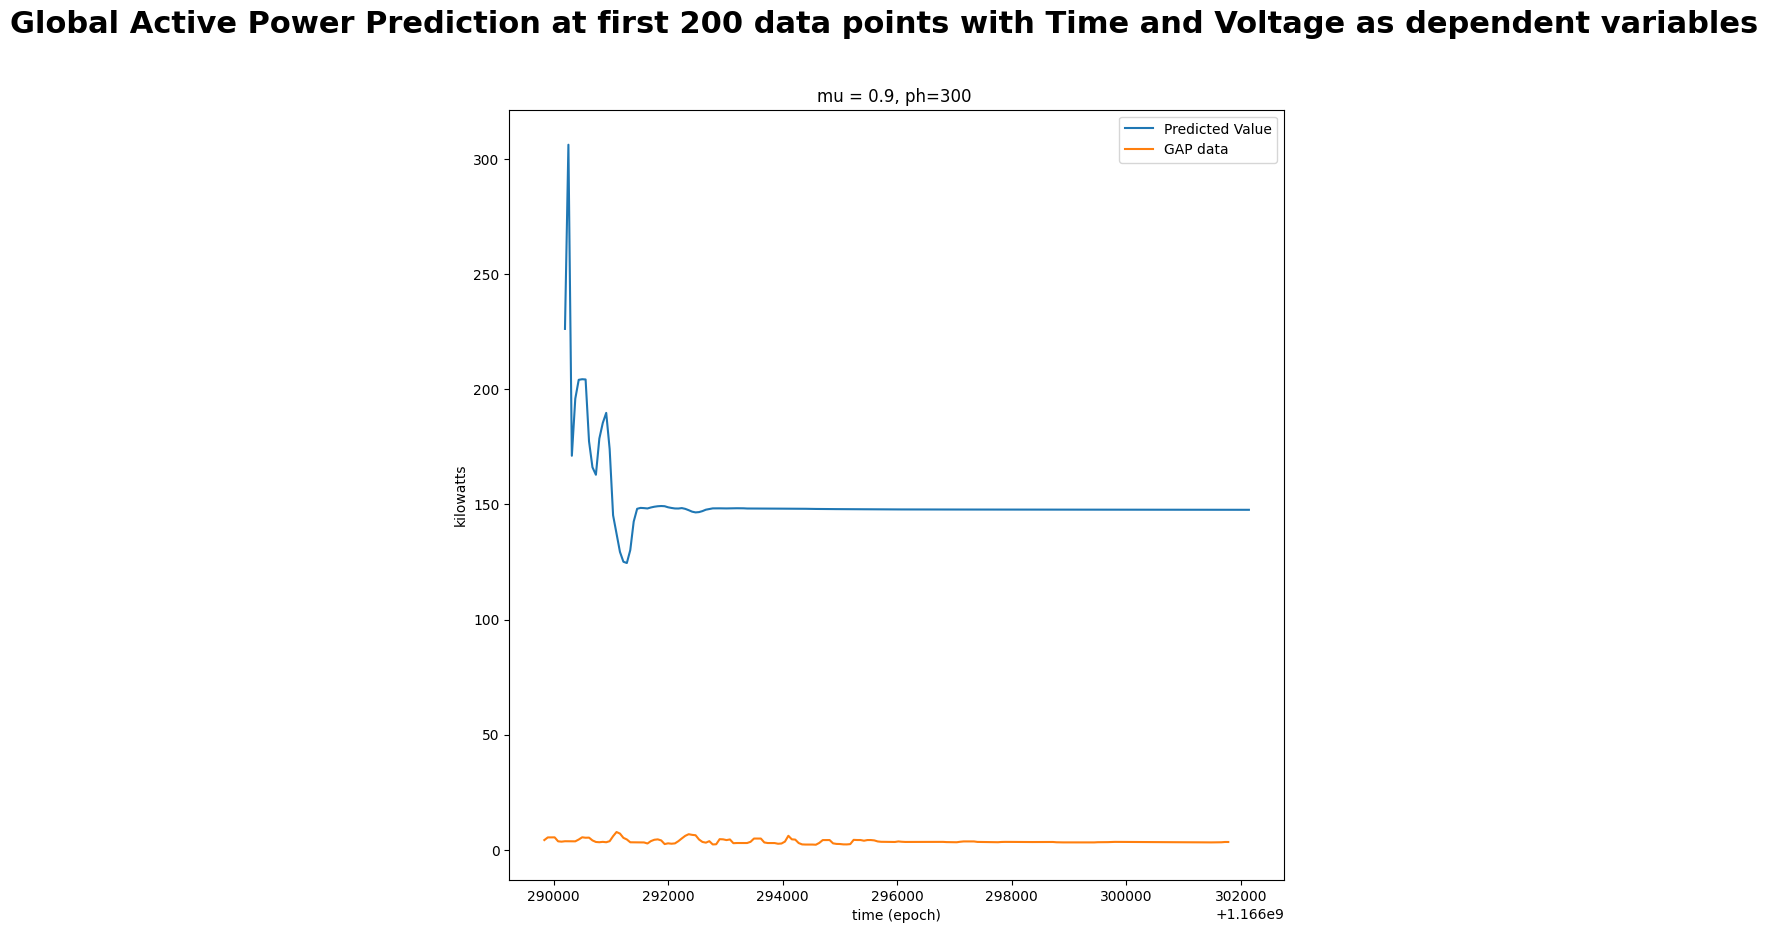

In [ ]:
#Plot first 200 data points/predictions for the expanded dataset
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction at first 200 data points with Time and Voltage as dependent variables', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

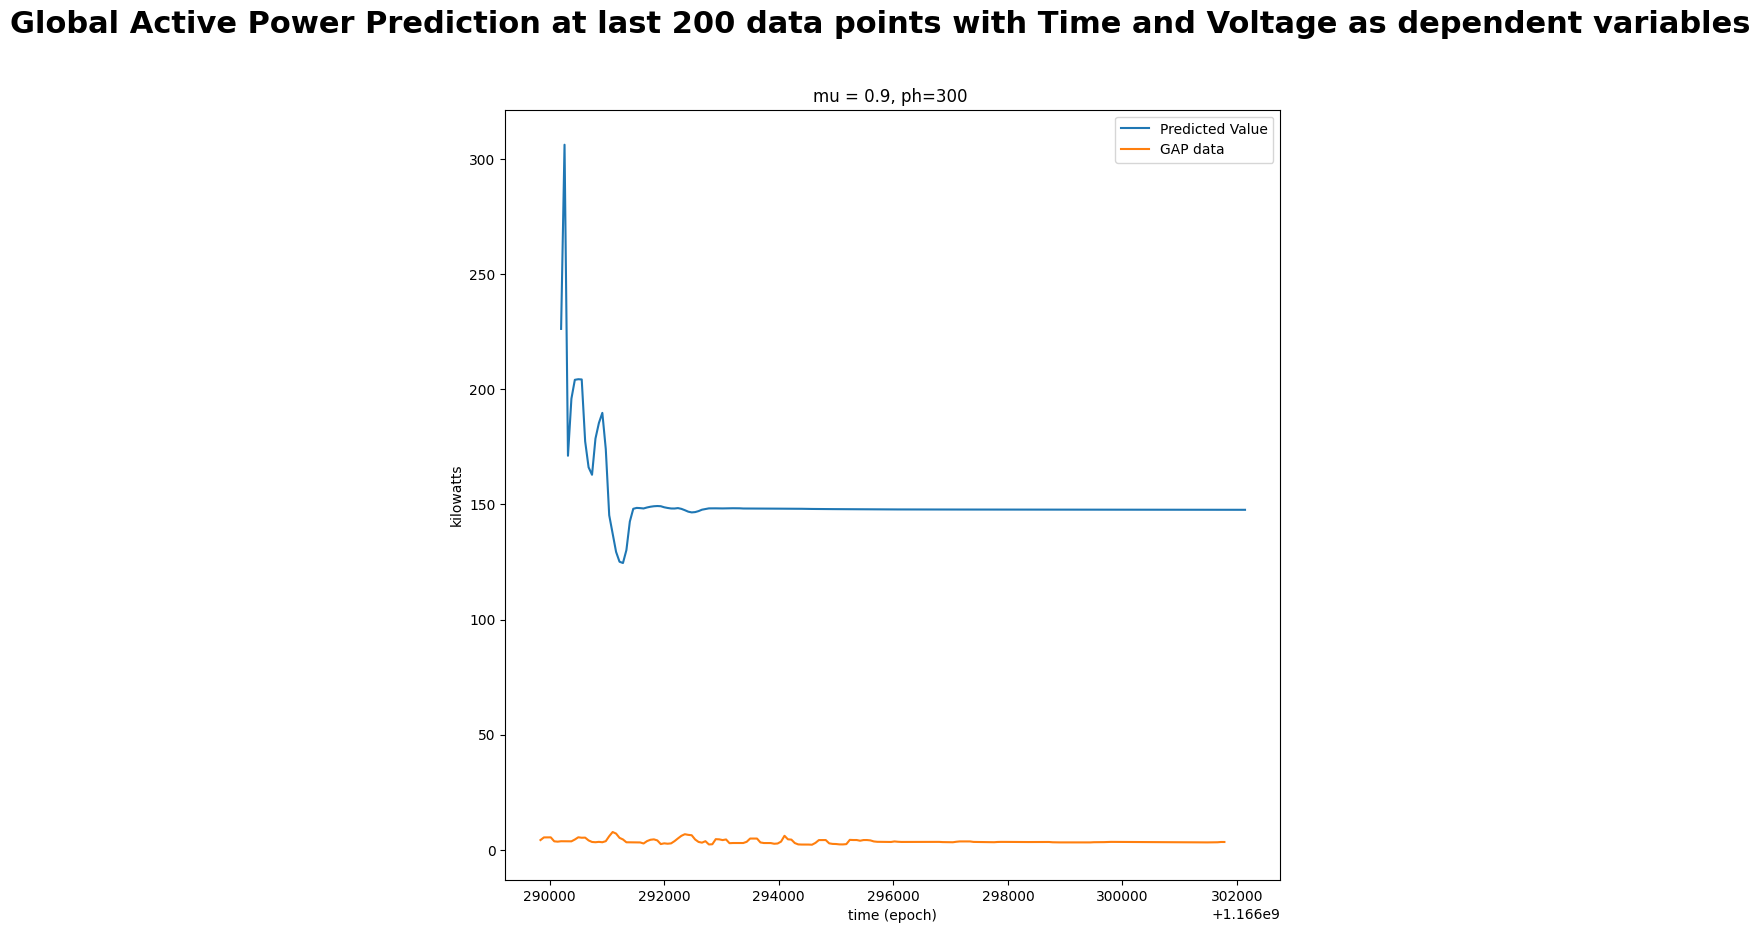

In [ ]:
#Plot last 200 data points/predictions for the expanded data
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction at last 200 data points with Time and Voltage as dependent variables', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

In [ ]:
#Calculate MSE of predictions for the expanded data.
print("MSE with 'time and Voltage as dependant variables of GAP' ;  for the last 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[0:200], yp_pred[0:200]))
print("MSE with 'time and Voltage as dependant variables of GAP';  for the first 200 data point  is", mean_squared_error(ys['Global_active_power'].iloc[:200], yp_pred[:200]))

MSE with 'time and Voltage as dependant variables of GAP' ;  for the last 200 data point  is 21904.84692163549
MSE with 'time and Voltage as dependant variables of GAP';  for the first 200 data point  is 21904.84692163549


**Q: How did the model performed when you added the voltage data? How does it compare to the models without it?**

A: After adding "Voltage" data as a dependent variable, the MSE value for the last and first 200 points was quite high. This indicates that the model's performance is not  satisfactory when using "time" and "voltage" together as predictors of "Global_active_power".

There are some considerations that we need to look before adding too many variables as predictors:

1.- Correlation between variables; there might not be a strong linear relationship between : time, voltage and global active power.If there is not a strong correlation, then the linear regression model won't perform well.

2.- Feature Scaling: we need too consider that times (unix/epochs) is set up in seconds and voltage as decimal format. Maybe we should add variables with same similar scale.

There are lots of other ways that we could try to improve our model while still using linear regression.

**TODO: Choose one alternative model and re-run the prediction code. Some ideas include:**

- Use a moving average as the response variable
- Make your prediction based on the time of day instead of as a continuous time series
- Use a moving window to limit your predictions instead of using a mu factor

**Q: Describe your alternative model and why it might improve your model**

A: I am opting to use a moving window to limit predictions instead of employing a decay factor. With this technique, rather than incorporating all historical data with a decay factor, I will confine the analysis to a subset of recent data within a fixed window. The decision to adopt this technique is motivated by two key factors:

- Focusing on Recent Trends: By utilizing a moving window, predictions are primarily influenced by recent data points.

- Adaptation to Changes: The model will adapt quickly to changes in the underlying patterns of the data. In the presence of sudden shifts or fluctuations, the model can respond more rapidly compared to using a decay factor.

We have already observed that training time as a predictor of Global Active Power reflects a trend from previous models, and we could achieve good performance by setting μ=1. The challenge presented by this technique lies in finding an optimal window size.

In [ ]:
#create your alternative training data here
n_s = len(df)
window_size = 10  # Adjusting window_size to 10 data points. This value was chosen after multiple experiments.
ph = 1

# Initialize arrays to store predicted time and values
tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)


In [ ]:
#re-run the prediction code here
for i in range(2, n_s + 1):
    ts_tmp = df['unix'].iloc[max(0, i - window_size):i]
    ys_tmp = df['Global_active_power'].iloc[max(0, i - window_size):i]
    ns = len(ys_tmp)

    weights = np.ones(ns) / ns

    lm_tmp = LinearRegression()
    lm_tmp.fit(ts_tmp.values.reshape(-1, 1), ys_tmp, sample_weight=weights)
    model_tmp = lm_tmp.predict(ts_tmp.values.reshape(-1, 1))

    m_tmp = lm_tmp.coef_[0]
    q_tmp = lm_tmp.intercept_

    tp = ts_tmp.iloc[-1] + ph
    yp = m_tmp * tp + q_tmp

    tp_pred[i - 2] = tp
    yp_pred[i - 2] = yp

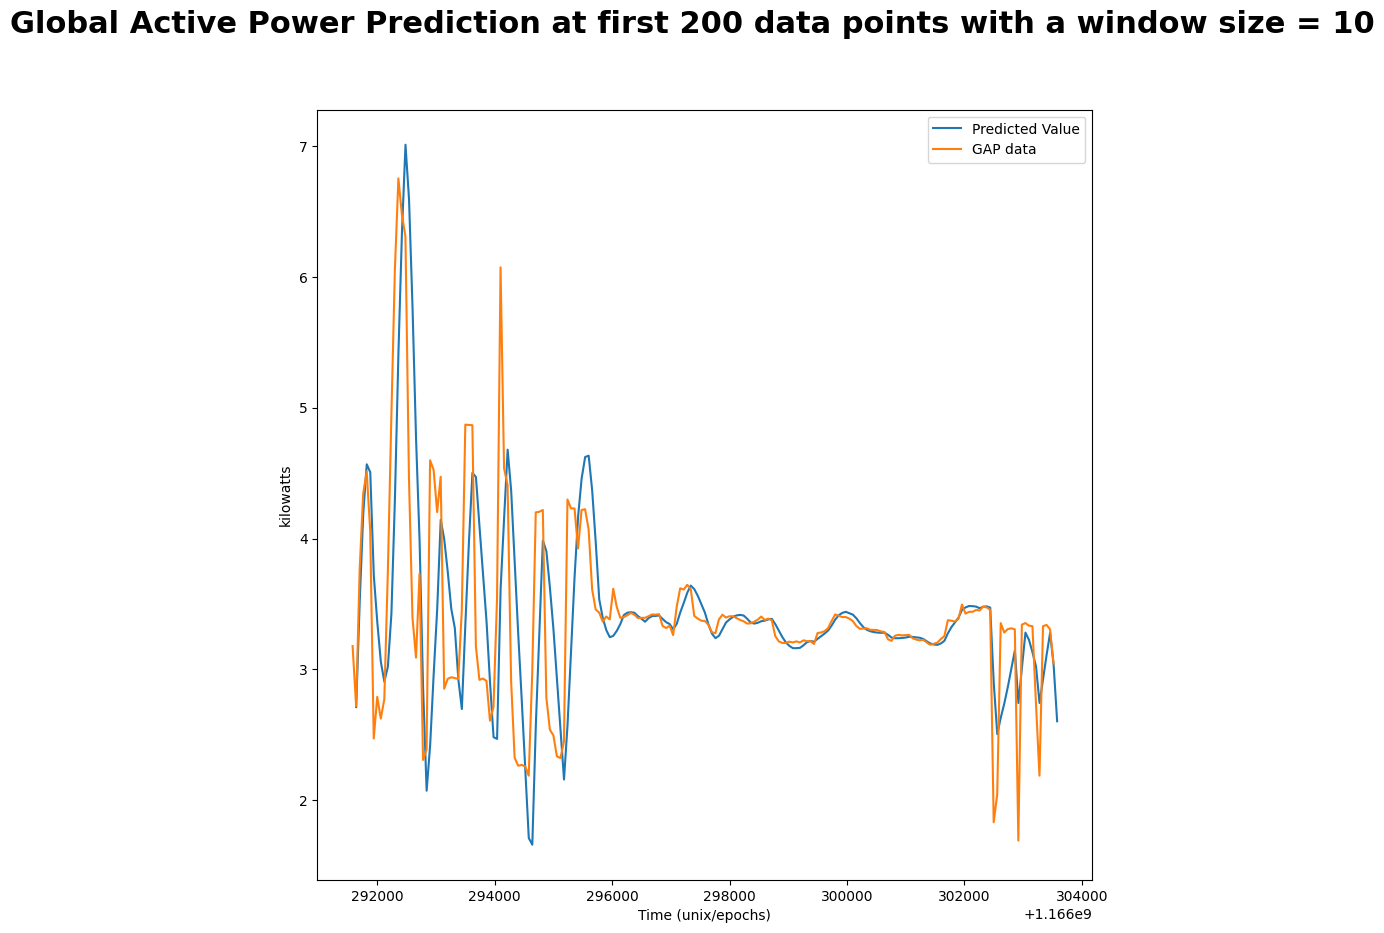

In [ ]:
#Plot first 200 data points/predictions for alternative model
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction at first 200 data points with a window size = 10', fontsize=22, fontweight='bold')
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='GAP data')
ax.set_xlabel('Time (unix/epochs)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

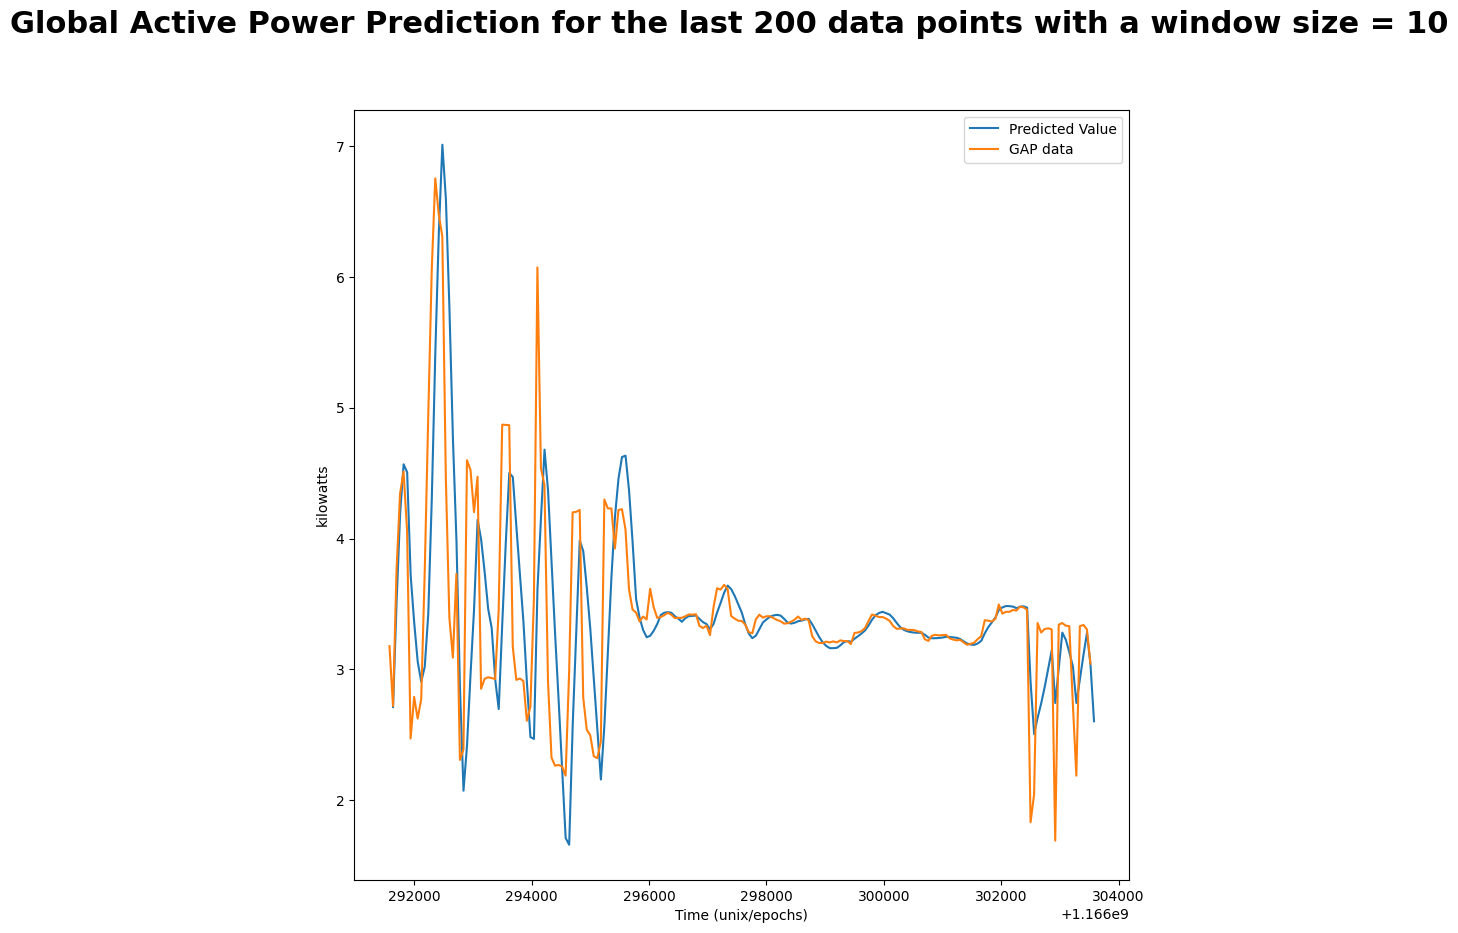

In [ ]:
#Plot last 200 data points/predictions for alternative model
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for the last 200 data points with a window size = 10', fontsize=22, fontweight='bold')
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('Time (unix/epochs)')
ax.set_ylabel('kilowatts')
ax.legend()
plt.show()

In [ ]:
#Calculate MSE of predictions for alternative model.
print("MSE with time as dependant variables of GAP with a window size of 10 data points: ", mean_squared_error(ys['Global_active_power'].iloc[0:200], yp_pred[0:200]))

MSE with time as dependant variables of GAP with a window size of 10 data points:  0.1675729495705255


**Q: Did your alternative model improve on our previous results? What else could you do to improve the model while still using linear regression?**

A: Yes, it did. We achieved an MSE (Mean Squared Error) of 0.1675729495705255 by adjusting the window size to 10 data points. These results prove that by adjusting to a fixed window size, we can observe a better prediction data line that more accurately follows the trend of the real data.

It is worth mentioning that I obtained this result after several trials of the same experiment. A larger window size was generating too much noise on the prediction line, introducing variations of high and low peaks that were underfitting the data. This implies that the model would be slower in adapting to changes.

As for any other room for improvement while using linear regression, I would suggest continuing to experiment with the window size, as it is a crucial parameter. Keep iterating until you find a size that strikes the best balance between capturing relevant trends and avoiding sensitivity to noise.


- Commments by Professor:
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.